# Group Members
1.  21L-5212 Muhammad Umer Hamid 
2.  21L-5480 Tania Waseem
3.  21L-5487 Fatima Pirzada

# Importing Libraries

In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib as stp
import seaborn as sns

import warnings
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures,LabelEncoder
warnings.filterwarnings('ignore')

df = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

# Understanding dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
print(f'The shape of dataframe:  {df.shape}')

The shape of dataframe:  (5110, 12)


In [9]:
df.sample(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4152,12857,Male,55.0,0,0,Yes,Self-employed,Rural,73.57,28.0,smokes,0
1013,45824,Female,77.0,1,0,Yes,Self-employed,Urban,102.01,29.5,Unknown,0
1615,33525,Male,53.0,0,0,Yes,Govt_job,Urban,113.40,35.1,smokes,0
4882,38441,Female,58.0,0,0,Yes,Private,Urban,65.45,32.1,never smoked,0
4118,57765,Female,41.0,0,0,Yes,Govt_job,Rural,146.08,29.9,never smoked,0
4325,30650,Male,54.0,0,0,Yes,Govt_job,Rural,216.19,30.3,formerly smoked,0
3590,44656,Female,69.0,1,0,Yes,Private,Rural,112.69,33.5,formerly smoked,0
3623,13817,Male,19.0,0,0,No,Private,Urban,123.61,25.2,Unknown,0
3422,34543,Female,82.0,0,0,Yes,Self-employed,Rural,84.42,25.7,Unknown,0
4708,18263,Female,78.0,0,0,Yes,Self-employed,Urban,234.06,33.7,never smoked,0


In [10]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [12]:
def missing_values_plot():
    plt.figure(figsize = (16, 7))

    plt.subplot(1,2,1)
    sns.heatmap(df.isnull(), cbar=True, vmin=0, vmax=1)
    plt.title('Training dataset missing values')

    plt.show()

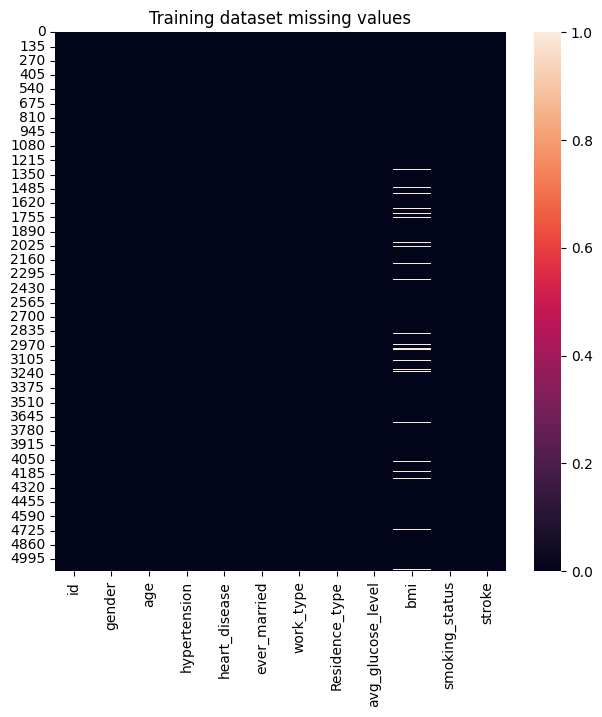

In [13]:
missing_values_plot()   #null values detected 

stroke
0    4861
1     249
Name: count, dtype: int64


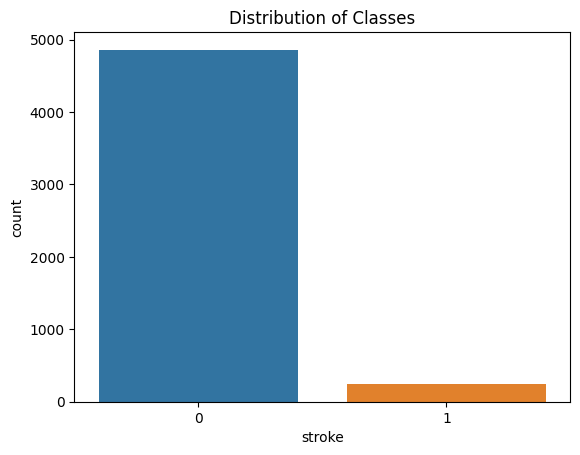

In [14]:
#Univariates Analysis
print(df.value_counts("stroke"))
sns.countplot(x = 'stroke', data=df)
plt.title('Distribution of Classes')
plt.show()                         
##imbalanced target data identified

In [15]:
df.drop(['id'],axis=1,inplace=True)

# Data Preprocessing and Plotting

In [16]:
df.bmi.mean()

28.893236911794666

In [17]:
df.fillna(df.bmi.mean(),inplace=True)

In [18]:
df.isnull().sum()   #checking missing values

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

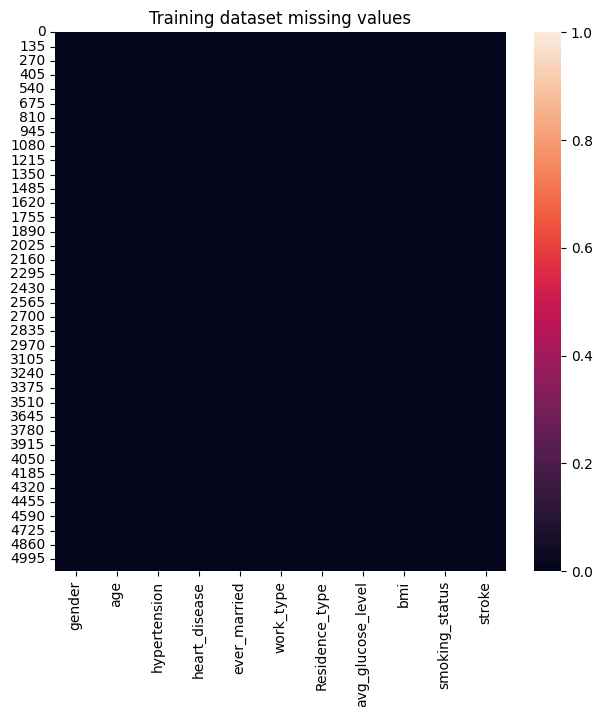

In [19]:
missing_values_plot()   #null values resolved

In [20]:
for col in df.columns:
    if df[col].dtype=='object':
        print(col)
        print(df[col].unique())

gender
['Male' 'Female' 'Other']
ever_married
['Yes' 'No']
work_type
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type
['Urban' 'Rural']
smoking_status
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


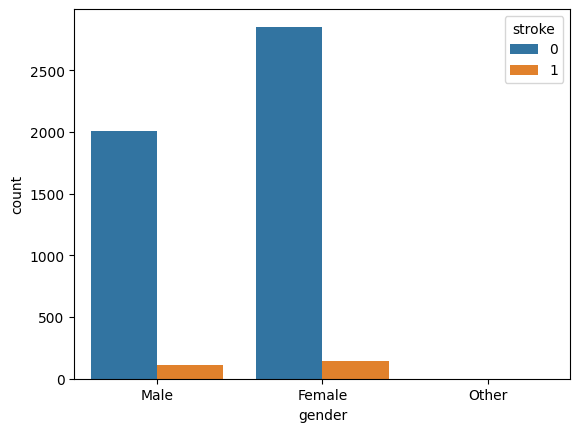

In [21]:
sns.countplot(data=df,x='gender',hue='stroke')
plt.show()

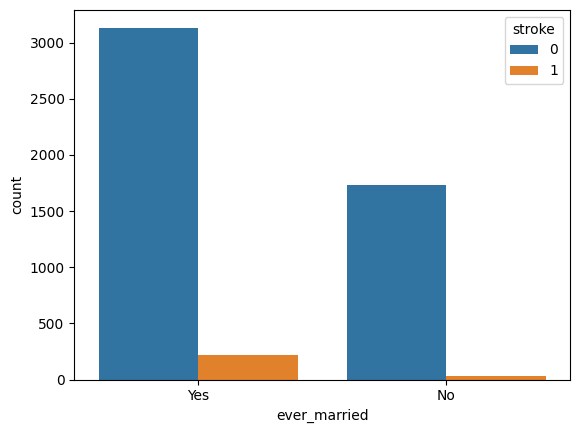

In [22]:
sns.countplot(data=df,x='ever_married',hue='stroke')
plt.show()

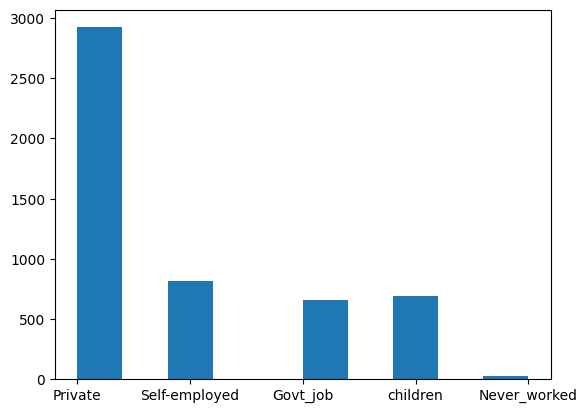

In [23]:
plt.hist(x='work_type',data=df)
plt.show()

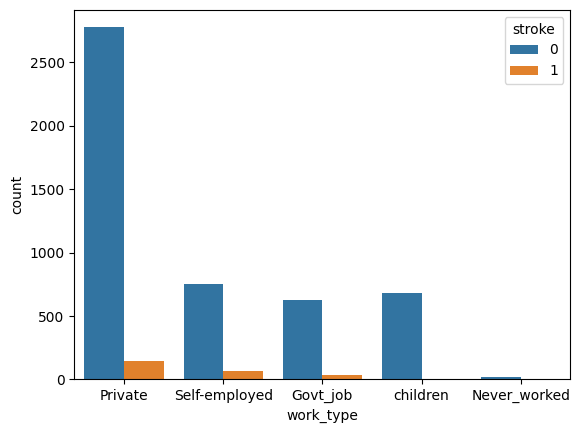

In [24]:
sns.countplot(data=df,x='work_type',hue='stroke')
plt.show()

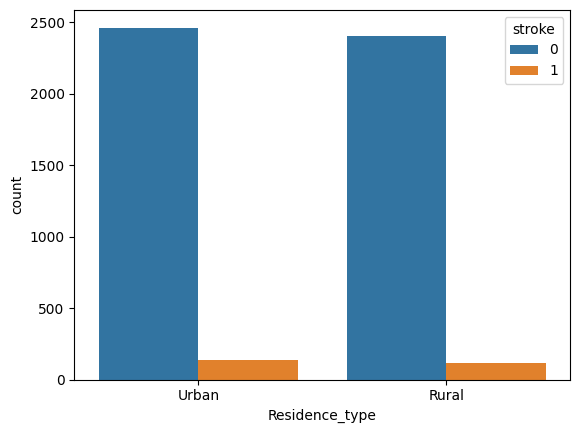

In [25]:
sns.countplot(data=df,x='Residence_type',hue='stroke')
plt.show()

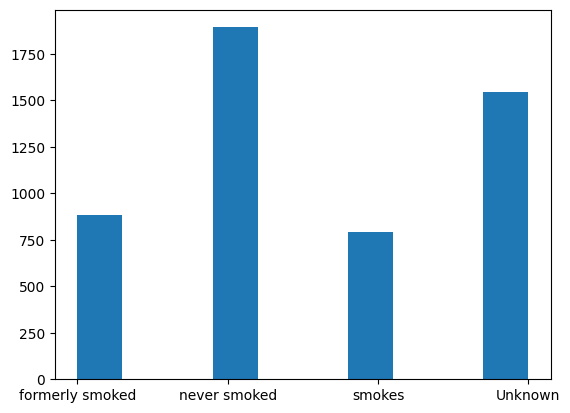

In [26]:
plt.hist(x='smoking_status',data=df)
plt.show()

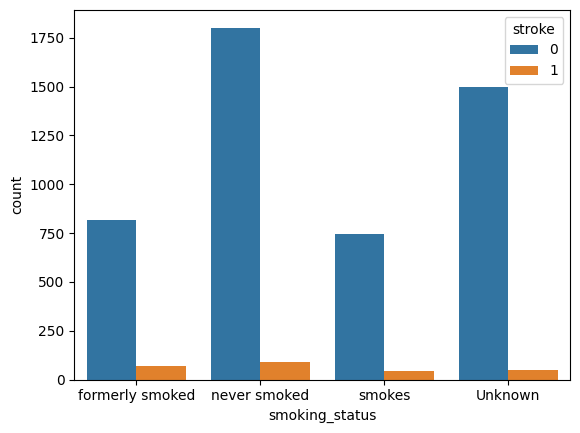

In [27]:
sns.countplot(data=df,x='smoking_status',hue='stroke')
plt.show()

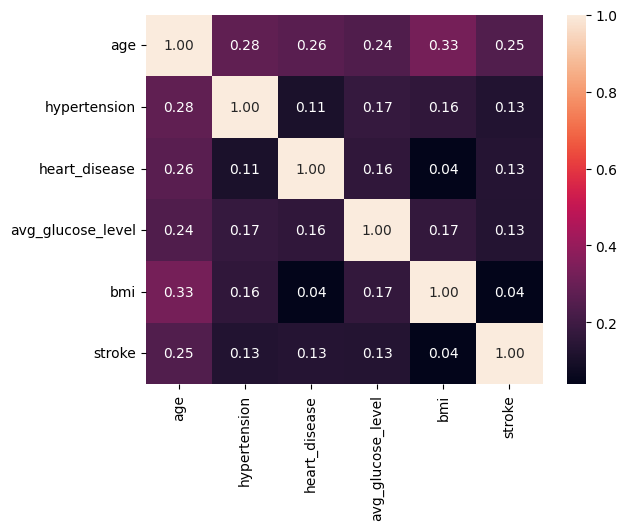

In [28]:
df2=df.copy()
df2.drop(['gender','work_type','ever_married','smoking_status','Residence_type'],axis=1,inplace=True)
sns.heatmap(data=df2.corr(),annot=True,fmt='.2f')
plt.show()

# Encoding

In [29]:
encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=encoder.fit_transform(df[col])      #converting categorical to numerical data

In [30]:
df.sample(20)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
762,0,17.0,0,0,0,2,0,173.43,25.6,3,0
3038,1,19.0,0,0,0,2,0,120.46,22.2,0,0
4138,0,80.0,0,0,1,3,1,73.87,33.7,2,0
143,0,69.0,1,1,0,3,1,72.17,36.8,2,1
1685,0,30.0,0,0,1,2,1,123.65,44.0,3,0
1928,0,5.0,0,0,0,4,0,102.04,18.5,0,0
3181,1,54.0,0,1,1,0,1,90.30,30.8,3,0
5056,0,40.0,0,0,1,2,1,89.61,41.2,1,0
4384,0,32.0,0,0,1,2,1,85.18,22.2,3,0
4629,1,36.0,0,0,1,2,1,92.23,32.8,2,0


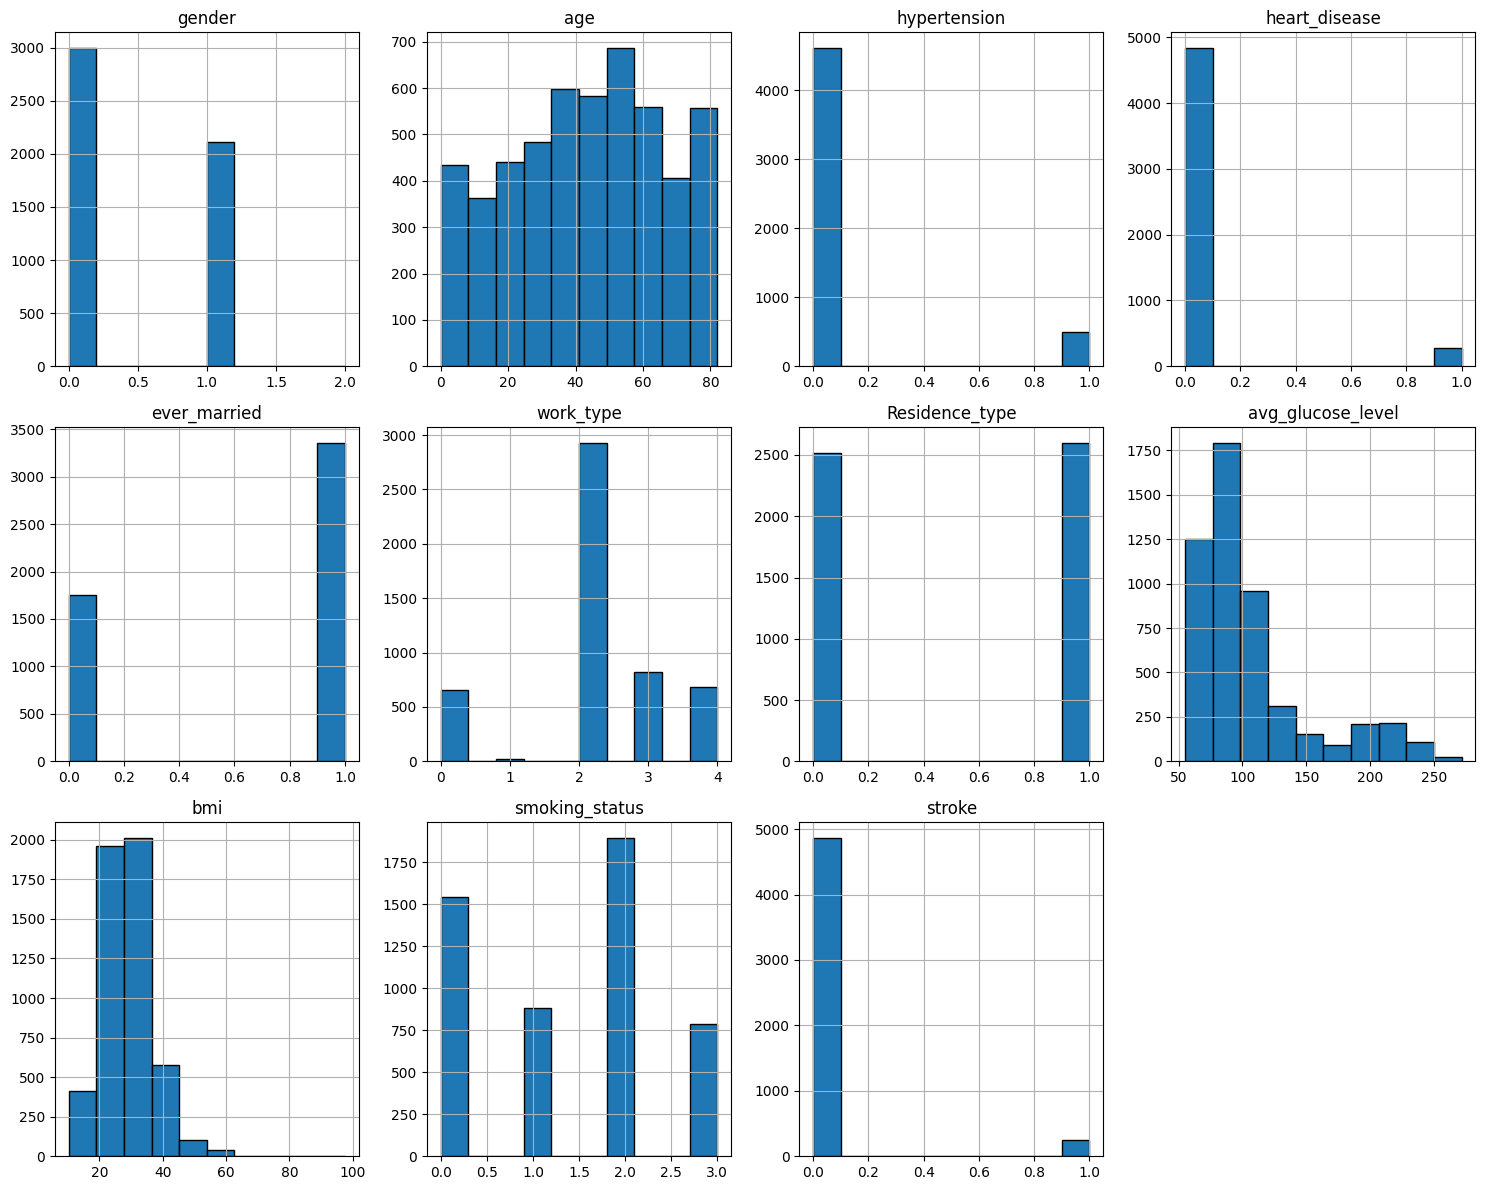

In [31]:
df.hist(bins=10, figsize=(15, 12), layout=(3, 4), edgecolor='black')
plt.tight_layout()
plt.show()

<Figure size 4000x4000 with 0 Axes>

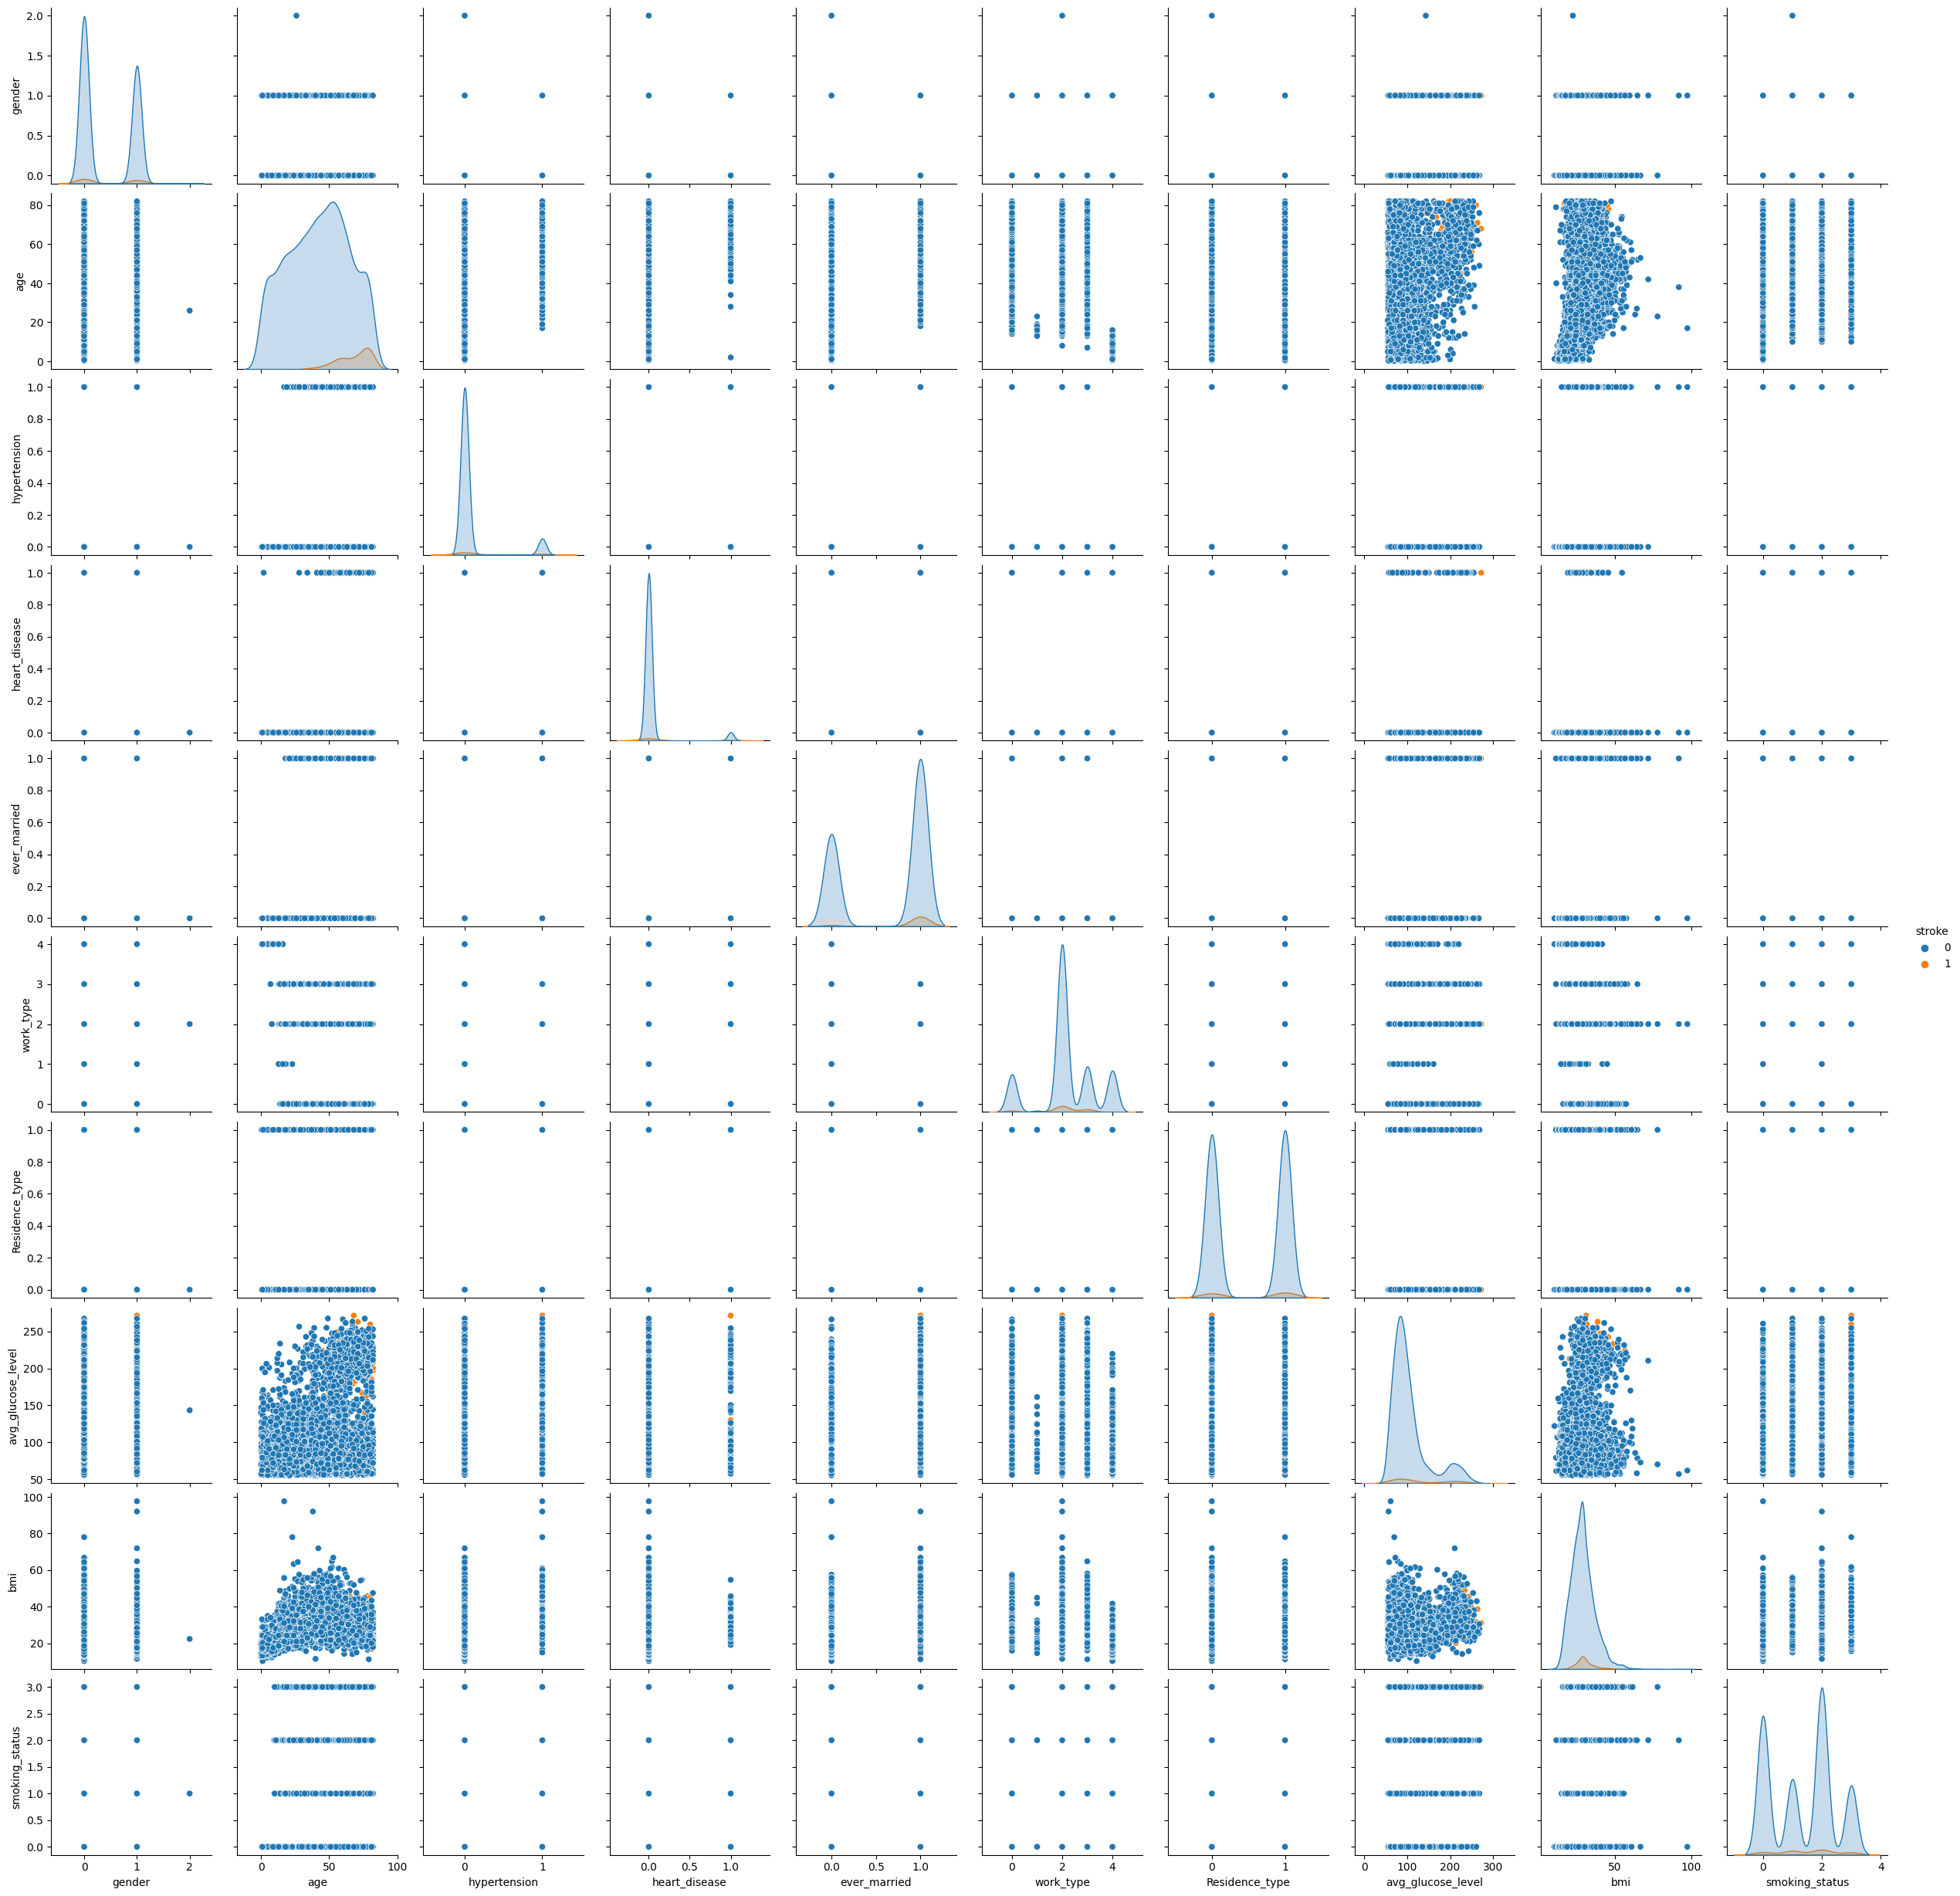

In [32]:
plt.figure(figsize=(40,40))
sns.pairplot(df,hue='stroke')
plt.show()

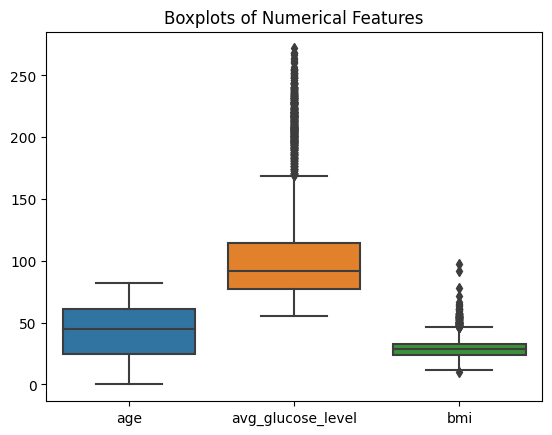

In [33]:
sns.boxplot(data=df.drop(['work_type', 'smoking_status', 'ever_married', 'Residence_type','stroke', 'gender', 'hypertension', 'heart_disease'], axis=1))
plt.title('Boxplots of Numerical Features')
plt.show()    #outliers detected 

# Handling Outliers

<Axes: xlabel='avg_glucose_level'>

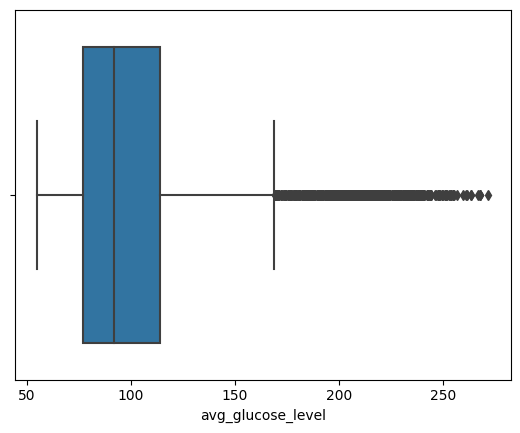

In [34]:
sns.boxplot(x='avg_glucose_level', data=df)


<Axes: xlabel='bmi'>

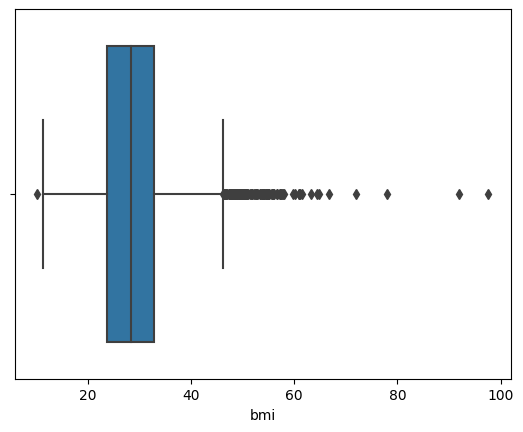

In [35]:
sns.boxplot(x='bmi', data=df)

Old Shape:  (5110, 11)
New Shape:  (4483, 11)


<Axes: xlabel='avg_glucose_level'>

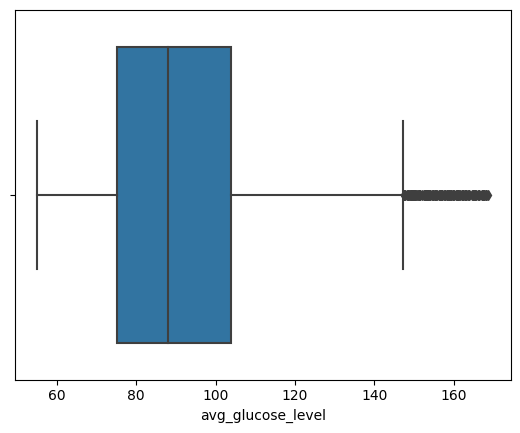

In [36]:
Q1 = np.percentile(df['avg_glucose_level'], 25, interpolation='midpoint')
Q3 = np.percentile(df['avg_glucose_level'], 75, interpolation='midpoint')

IQR = Q3 - Q1
print("Old Shape: ", df.shape)

# Upper Bound
upper_bound = Q3 + 1.5 * IQR

# Lower Bound
lower_bound = Q1 - 1.5 * IQR

# Removing the outliers.
df = df[(df['avg_glucose_level'] >= lower_bound) & (df['avg_glucose_level'] <= upper_bound)]

print("New Shape: ", df.shape)

sns.boxplot(x='avg_glucose_level', data=df)


Old Shape:  (4483, 11)
New Shape:  (4383, 11)


<Axes: xlabel='bmi'>

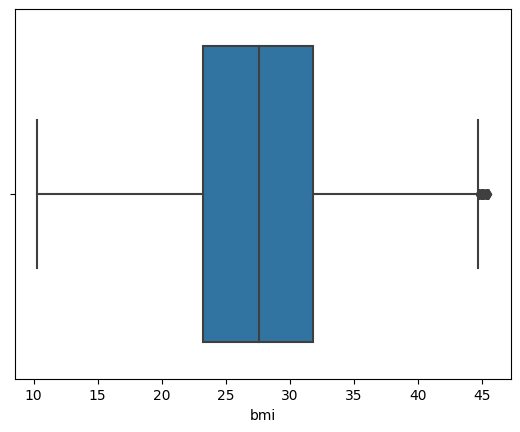

In [37]:
Q1 = np.percentile(df['bmi'], 25, interpolation='midpoint')
Q3 = np.percentile(df['bmi'], 75, interpolation='midpoint')

IQR = Q3 - Q1
print("Old Shape: ", df.shape)

# Upper Bound
upper_bound = Q3 + 1.5 * IQR

# Lower Bound
lower_bound = Q1 - 1.5 * IQR

# Removing the outliers.
df = df[(df['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)]

print("New Shape: ", df.shape)

sns.boxplot(x='bmi', data=df)


# Scaling

In [38]:
data = df.drop(['work_type', 'smoking_status', 'ever_married', 'Residence_type','stroke', 'gender', 'hypertension', 'heart_disease'], axis=1).copy()

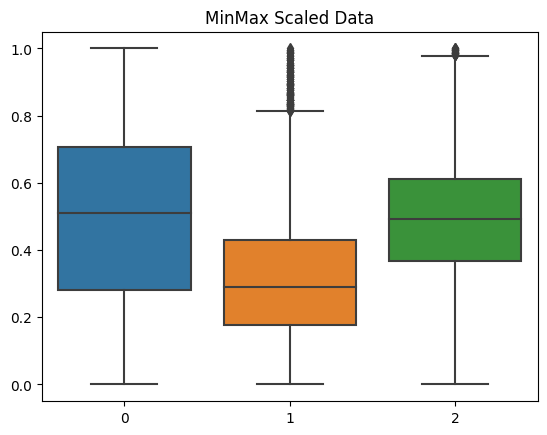

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

sns.boxplot(data=scaled_data)
plt.title('MinMax Scaled Data')
plt.show()

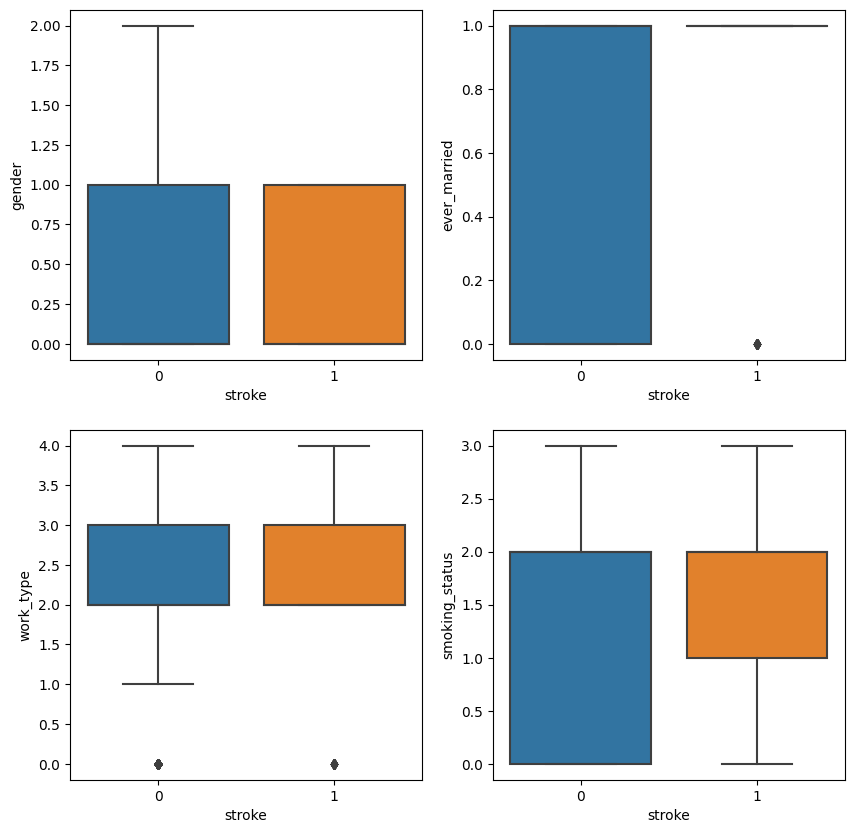

In [40]:
def graph(y):
    sns.boxplot(x="stroke", y=y, data=df)

plt.figure(figsize=(10, 10))


plt.subplot(221)
graph('gender')

plt.subplot(222)
graph('ever_married')

plt.subplot(223)
graph('work_type')

plt.subplot(224)
graph('smoking_status')

plt.show()

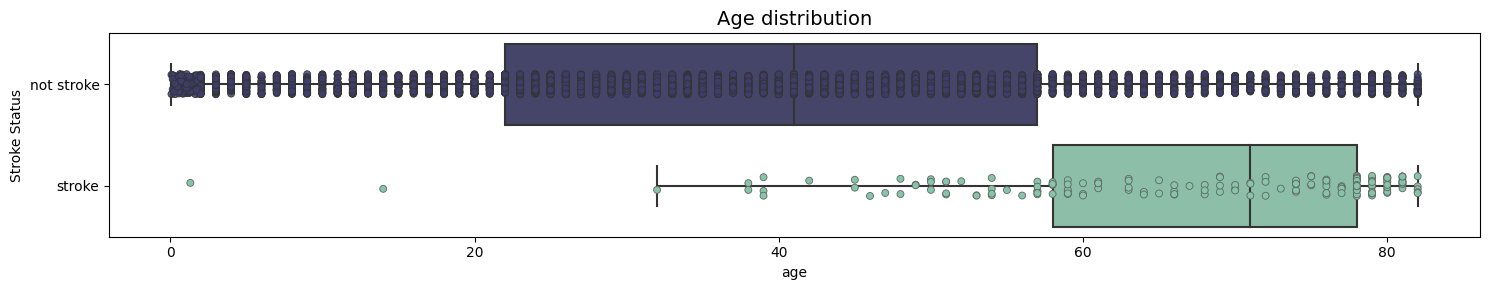

In [41]:
plt.figure(figsize=(15, 3))


sns.boxplot(y = 'stroke', x = 'age', data = df,
     palette=["#3f3e6fd1", "#85c6a9"], fliersize = 0, orient = 'h')


sns.stripplot(y = 'stroke', x = 'age', data = df,
     linewidth = 0.6, palette=["#3f3e6fd1", "#85c6a9"], orient = 'h')

plt.yticks( np.arange(2), ['not stroke', 'stroke'])
plt.title('Age distribution',fontsize= 14)
plt.ylabel('Stroke Status')
plt.tight_layout()

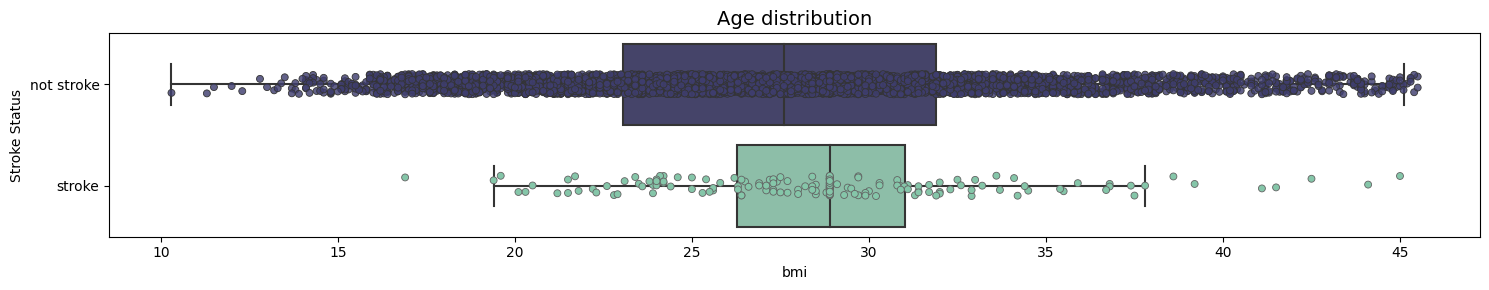

In [42]:
plt.figure(figsize=(15, 3))


sns.boxplot(y = 'stroke', x = 'bmi', data = df,
     palette=["#3f3e6fd1", "#85c6a9"], fliersize = 0, orient = 'h')


sns.stripplot(y = 'stroke', x = 'bmi', data = df,
     linewidth = 0.6, palette=["#3f3e6fd1", "#85c6a9"], orient = 'h')

plt.yticks( np.arange(2), ['not stroke', 'stroke'])
plt.title('Age distribution',fontsize= 14)
plt.ylabel('Stroke Status')
plt.tight_layout()

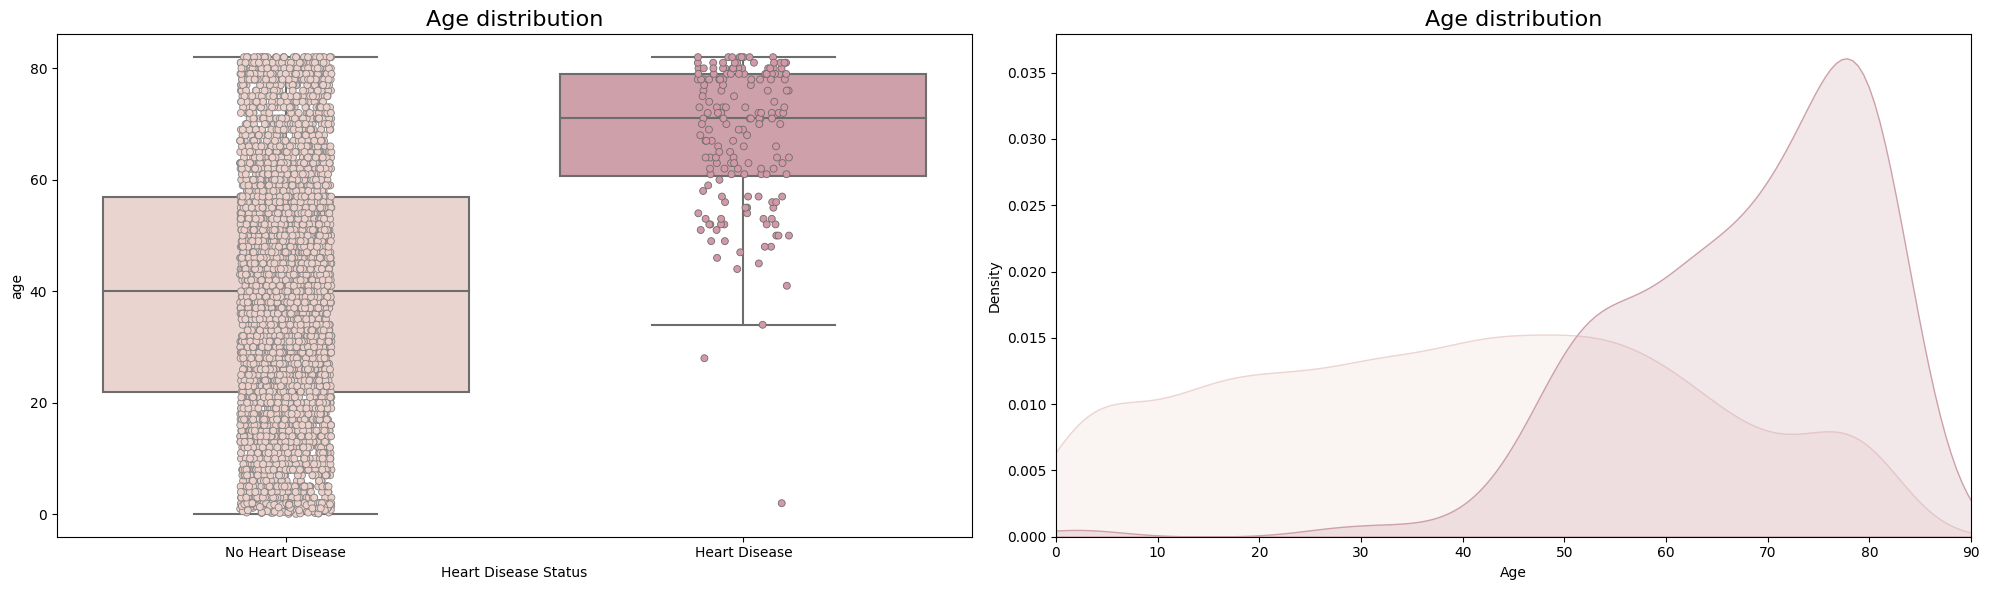

In [43]:
# set size
plt.figure(figsize=(20, 6))

# set palette
palette = sns.cubehelix_palette(5, start = 3)

plt.subplot(1, 2, 1)
sns.boxplot(x = 'heart_disease', y = 'age', data = df,
     palette = palette, fliersize = 0)

sns.stripplot(x = 'heart_disease', y = 'age', data = df,
     linewidth = 0.6, palette = palette)
plt.xticks( np.arange(2), ['No Heart Disease','Heart Disease'])
plt.title('Age distribution',fontsize= 16)
plt.xlabel('Heart Disease Status')


plt.subplot(1, 2, 2)

age_1_class = df[(df["age"] > 0) & 
                              (df["heart_disease"] == 0)]
age_2_class = df[(df["age"] > 0) & 
                              (df["heart_disease"] == 1)]

# Ploting the 3 variables that we create
sns.kdeplot(age_1_class["age"], shade=True, color='#eed4d0', label = 'No Heart Disease')
sns.kdeplot(age_2_class["age"], shade=True,  color='#cda0aa', label = 'Heart Disease')
plt.title('Age distribution',fontsize= 16)
plt.xlabel('Age')
plt.xlim(0, 90)
plt.tight_layout()
plt.show()

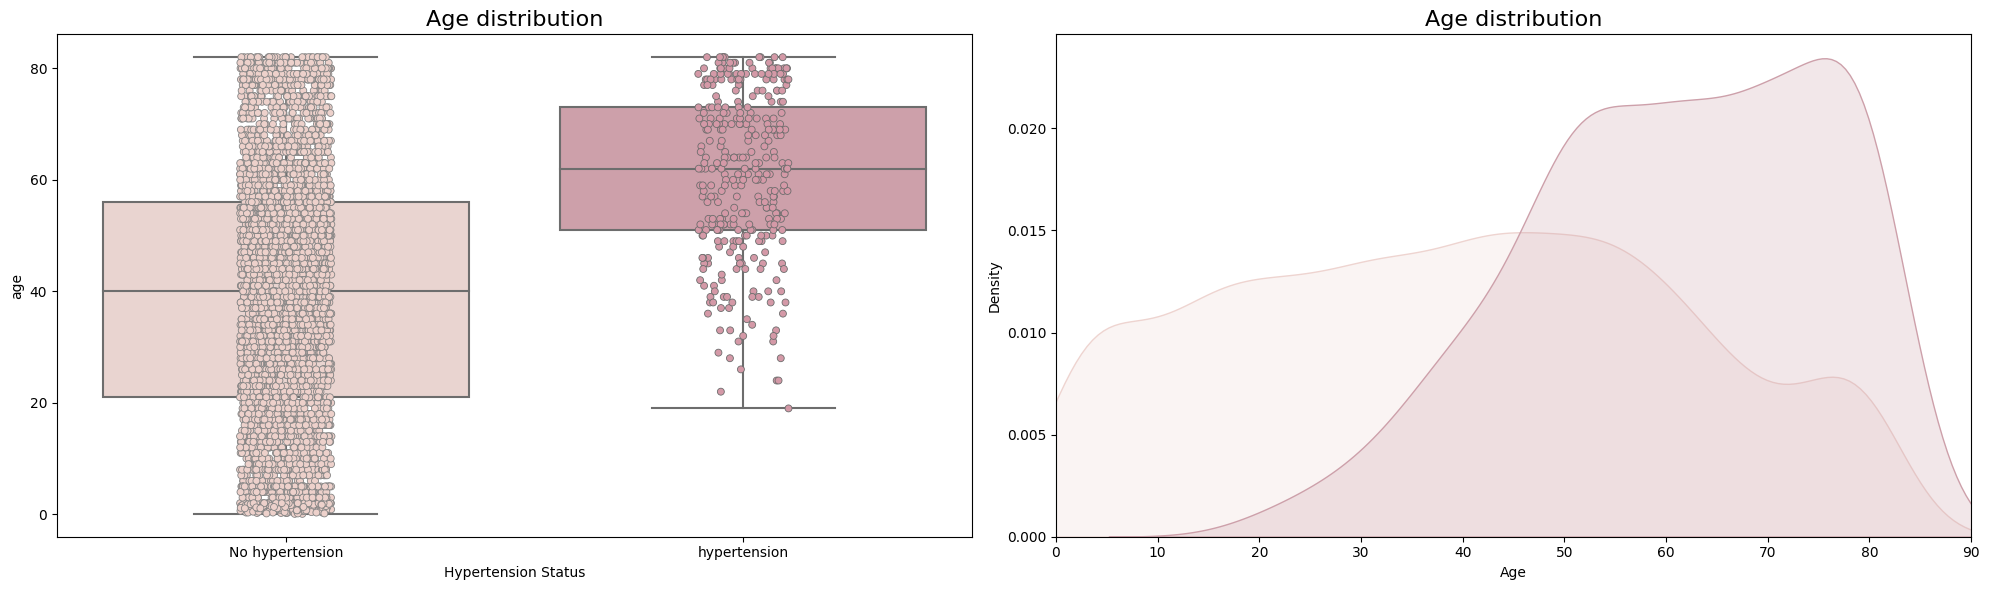

In [44]:
# set size
plt.figure(figsize=(20, 6))

# set palette
palette = sns.cubehelix_palette(5, start = 3)

plt.subplot(1, 2, 1)
sns.boxplot(x = 'hypertension', y = 'age', data = df,
     palette = palette, fliersize = 0)

sns.stripplot(x = 'hypertension', y = 'age', data = df,
     linewidth = 0.6, palette = palette)
plt.xticks( np.arange(2), ['No hypertension','hypertension'])
plt.title('Age distribution',fontsize= 16)
plt.xlabel('Hypertension Status')


plt.subplot(1, 2, 2)

age_1_class = df[(df["age"] > 0) & 
                              (df["hypertension"] == 0)]
age_2_class = df[(df["age"] > 0) & 
                              (df["hypertension"] == 1)]

# Ploting the 3 variables that we create
sns.kdeplot(age_1_class["age"], shade=True, color='#eed4d0', label = 'No hypertension')
sns.kdeplot(age_2_class["age"], shade=True,  color='#cda0aa', label = 'Hypertension')
plt.title('Age distribution',fontsize= 16)
plt.xlabel('Age')
plt.xlim(0, 90)
plt.tight_layout()
plt.show()

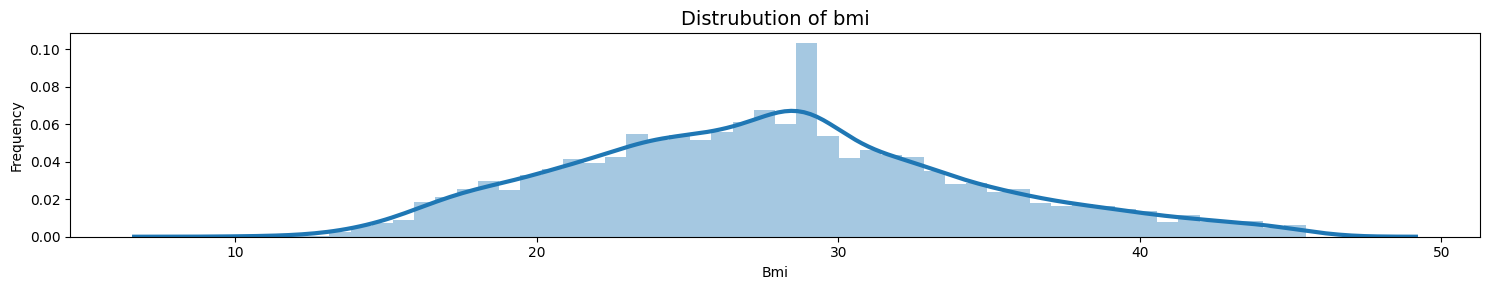

In [45]:
plt.figure(figsize=(15, 3))


sns.distplot(df[(df["bmi"] > 0)].bmi, kde_kws={"lw": 3}, bins = 50)

# set titles and labels
plt.title('Distrubution of bmi',fontsize= 14)
plt.xlabel('Bmi')
plt.ylabel('Frequency')
# clean layout
plt.tight_layout()

In [46]:

age_1_class_stat = pd.DataFrame(age_1_class.groupby('gender')['age'].describe())
age_2_class_stat = pd.DataFrame(age_2_class.groupby('gender')['age'].describe())


pd.concat([age_1_class_stat, age_2_class_stat], axis=0, sort = False, keys = ['1st', '2nd'])

count       mean        std    min   25%   50%   75%   max
    gender                                                             
1st 0       2404.0  40.198686  21.618954   0.08  23.0  40.0  56.0  82.0
    1       1652.0  37.953220  23.234059   0.08  17.0  39.0  56.0  82.0
    2          1.0  26.000000        NaN  26.00  26.0  26.0  26.0  26.0
2nd 0        181.0  62.701657  14.979595  19.00  52.0  64.0  76.0  82.0
    1        145.0  58.800000  14.003273  24.00  49.0  60.0  71.0  82.0

# Splitting

In [82]:
features_list = df.columns.to_list()
features_data, target_data = df[features_list[:-1]], df[features_list[-1]]
print("Features: ", features_data.columns)
print("Target: ", target_data.name)
X_train, X_test,y_train, y_test = train_test_split(features_data, target_data, stratify=target_data, test_size=0.25)

#stratifying on the baisis of target variable i.e stroke because of largely imbalanced data, this will ensure that the train and test data have exactly 75:25 ratio of stroke occurence

Features:  Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')
Target:  stroke


In [83]:
y_train.value_counts()

stroke
0    3164
1     123
Name: count, dtype: int64

In [84]:
y_test.value_counts()

stroke
0    1055
1      41
Name: count, dtype: int64

# Training Model using SVM

In [85]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [86]:
clf = SVC(kernel = "linear")
#Trained the model
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [87]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))  #checking accuracy score

Model accuracy score: 0.9626


In [88]:
y_pred_train = clf.predict(X_train)

y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [89]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9626


In [90]:
# print the scores on training and test set to check overfitting or underfitting 

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))



Training set score: 0.9626
Test set score: 0.9626


since both scores are almost equal so no quite overfitting or underfitting 

In [91]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1055    0]
 [  41    0]]

True Positives(TP) =  1055

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  41


<Axes: >

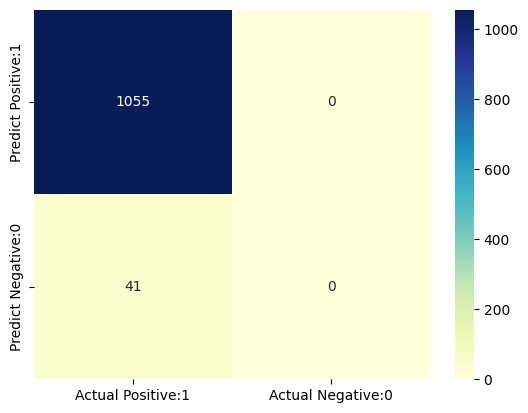

In [92]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [93]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy)
print('F1 Score:', f1)

Accuracy: 0.9625912408759124
F1 Score: 0.0


In [94]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1055
           1       0.00      0.00      0.00        41

    accuracy                           0.96      1096
   macro avg       0.48      0.50      0.49      1096
weighted avg       0.93      0.96      0.94      1096



The model is predicting no strokes well but not performing well for having strokes which may be a result of the imbalnaced data since 0 is the majority class. 

In [95]:
# Assign class weights to ensure that the minority class has a larger weightage
class_weights = {0: 1, 1: 10}

# Initialize the model with class weights
clf = SVC(kernel='linear', class_weight=class_weights)
clf.fit(X_train, y_train)

SVC(class_weight={0: 1, 1: 10}, kernel='linear')

In [96]:
y_pred = clf.predict(X_test)

In [97]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1055
           1       0.17      0.71      0.27        41

    accuracy                           0.86      1096
   macro avg       0.58      0.79      0.60      1096
weighted avg       0.96      0.86      0.90      1096



Confusion matrix

 [[911 144]
 [ 12  29]]

True Positives(TP) =  911

True Negatives(TN) =  29

False Positives(FP) =  144

False Negatives(FN) =  12


<Axes: >

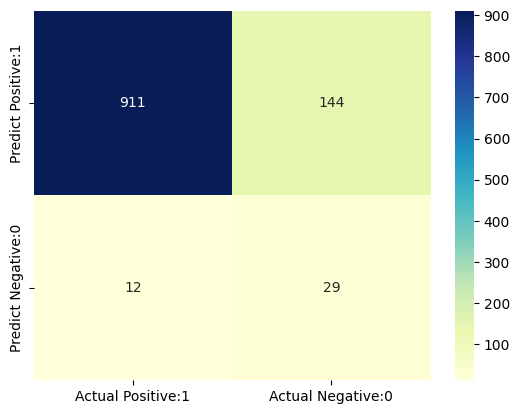

In [98]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [99]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy)
print('F1 Score:', f1)

Accuracy: 0.8576642335766423
F1 Score: 0.2710280373831776


performance has improved by adding weights
trying another model because random forest performs better for imbalanced dataset

# Training Model using Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [101]:
# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = clf.predict(X_test)

Confusion matrix

 [[1055    0]
 [  40    1]]

True Positives(TP) =  1055

True Negatives(TN) =  1

False Positives(FP) =  0

False Negatives(FN) =  40


<Axes: >

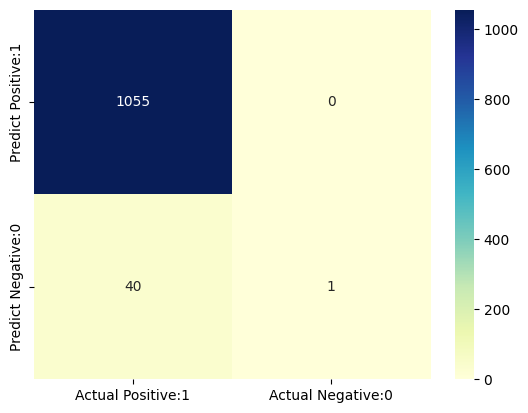

In [102]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [103]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1055
           1       1.00      0.02      0.05        41

    accuracy                           0.96      1096
   macro avg       0.98      0.51      0.51      1096
weighted avg       0.96      0.96      0.95      1096



In [104]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy)
print('F1 Score:', f1)

Accuracy: 0.9635036496350365
F1 Score: 0.047619047619047616


# Training Model by Gradient Boosting

In [105]:
from sklearn.ensemble import GradientBoostingClassifier

In [106]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [107]:
y_pred = clf.predict(X_test)

Confusion matrix

 [[1051    4]
 [  39    2]]

True Positives(TP) =  1051

True Negatives(TN) =  2

False Positives(FP) =  4

False Negatives(FN) =  39


<Axes: >

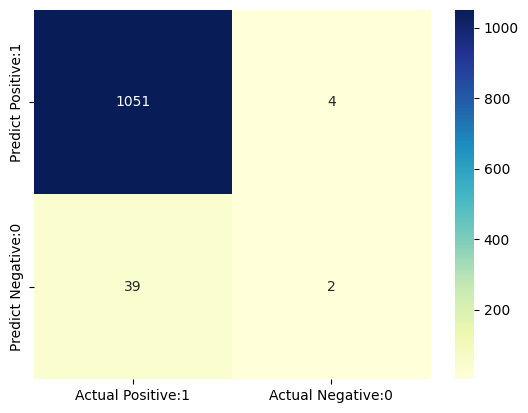

In [108]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [109]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1055
           1       0.33      0.05      0.09        41

    accuracy                           0.96      1096
   macro avg       0.65      0.52      0.53      1096
weighted avg       0.94      0.96      0.95      1096



In [110]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy)
print('F1 Score:', f1)

Accuracy: 0.9607664233576643
F1 Score: 0.0851063829787234


# Using SMOTE to handle imbalanced data

In [111]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df.drop('stroke', axis=1)  # Features
y = df['stroke']               # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Now, X_train_smote and y_train_smote have balanced classes

# Using Stratified KFold with Random Forest

In [114]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Number of folds
k = 5

# Stratified K-Folds cross-validator
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# StratifiedKFold split
for train_index, val_index in skf.split(X_train_smote, y_train_smote):
    X_train_fold, X_val_fold = X_train_smote.iloc[train_index], X_train_smote.iloc[val_index]
    y_train_fold, y_val_fold = y_train_smote.iloc[train_index], y_train_smote.iloc[val_index]

    # Train the model
    rf.fit(X_train_fold, y_train_fold)

    # Make predictions
    y_pred = rf.predict(X_val_fold)

    # Calculate metrics
    accuracy_list.append(accuracy_score(y_val_fold, y_pred))
    precision_list.append(precision_score(y_val_fold, y_pred))
    recall_list.append(recall_score(y_val_fold, y_pred))
    f1_list.append(f1_score(y_val_fold, y_pred))

# Average metrics across folds
avg_accuracy = np.mean(accuracy_list)
avg_precision = np.mean(precision_list)
avg_recall = np.mean(recall_list)
avg_f1 = np.mean(f1_list)

print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1)

Average Accuracy: 0.9589991415519515
Average Precision: 0.9462253136210108
Average Recall: 0.9733570019723865
Average F1-Score: 0.9595858755086495


# Using Stratified KFold with weighted SVM

In [115]:
# Number of folds
k = 5

# Stratified K-Folds cross-validator
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Weighted SVM Classifier
svm = SVC(class_weight='balanced', random_state=42)

# Lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# StratifiedKFold split
for train_index, val_index in skf.split(X_train_smote, y_train_smote):
    X_train_fold, X_val_fold = X_train_smote.iloc[train_index], X_train_smote.iloc[val_index]
    y_train_fold, y_val_fold = y_train_smote.iloc[train_index], y_train_smote.iloc[val_index]

    # Train the model
    svm.fit(X_train_fold, y_train_fold)

    # Make predictions
    y_pred = svm.predict(X_val_fold)

    # Calculate metrics
    accuracy_list.append(accuracy_score(y_val_fold, y_pred))
    precision_list.append(precision_score(y_val_fold, y_pred))
    recall_list.append(recall_score(y_val_fold, y_pred))
    f1_list.append(f1_score(y_val_fold, y_pred))

# Average metrics across folds
avg_accuracy = np.mean(accuracy_list)
avg_precision = np.mean(precision_list)
avg_recall = np.mean(recall_list)
avg_f1 = np.mean(f1_list)

print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1)

Average Accuracy: 0.7821210674538693
Average Precision: 0.7361234956222459
Average Recall: 0.8798097742713127
Average F1-Score: 0.8015372692992766
